# Code Section

I will use this Jupyter notebook to stage & review all data transformations & formulas needed for this assignment

In [1]:
import pandas as pd
import requests
import io
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
os.chdir(r'C:\Users\lwhieldon\OneDrive - SC&H Group\Administrative\School Materials\DATA 602 - Into to Data Analysis and ML\IntroToDataAnalysis\Images')

## Getting the data & Initial Observations

Let's import the csv file containing the data into a pandas dataframe. As you can see with the first 5 rows of data, each observation consists of a single order id. There are 14 attributes (Order Date, Customer ID, Segment, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Sales, Quantity of units sold, Discount, and Profit). We will drop Row ID from the dataset as it is redundant.

In [3]:
url = 'https://raw.githubusercontent.com/Lwhieldon/IntroToDataAnalysis/master/Assignments/Assignment%201/Sample%20-%20Superstore%20Data.csv'

download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df = df.drop(["Row ID"], axis=1)
df.head()

,Order ID,Order Date,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2018-152156,11/8/2018,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,CA-2018-152156,11/8/2018,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2,CA-2018-138688,6/12/2018,DV-13045,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,US-2017-108966,10/11/2017,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
4,US-2017-108966,10/11/2017,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164


Let's convert order date to a datetime format and create a new column for Year since the business would rather look at trends for future profit years. We are going to treat year as a categorical variable (even though it's numeric in the dataframe)

In [4]:
df['Order Year']=pd.DatetimeIndex(df['Order Date']).year
df = df.drop(['Order Date'], axis = 1)


In [5]:
#  Here's a snapshot of the info method so you can see the data type of each attribute, 
# the number of records, and the memory of the df.
# Notice also that there are no non-null values which is great from a data clean up perspective
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Customer ID   9994 non-null   object 
 2   Segment       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9983 non-null   float64
 6   Region        9994 non-null   object 
 7   Product ID    9994 non-null   object 
 8   Category      9994 non-null   object 
 9   Sub-Category  9994 non-null   object 
 10  Sales         9994 non-null   float64
 11  Quantity      9994 non-null   int64  
 12  Discount      9994 non-null   float64
 13  Profit        9994 non-null   float64
 14  Order Year    9994 non-null   int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 1.1+ MB


In [6]:
#Let's describe the data here to better understand the summary of the numerical attributes
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Order Year
count,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55245.233297,229.858001,3.789574,0.156203,28.656896,2017.722233
std,32038.715955,623.245101,2.225110,0.206452,234.260108,1.123555
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2016.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,2017.000000
50%,57103.000000,54.490000,3.000000,0.200000,8.666500,2018.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,2019.000000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2019.000000


Let's look specifically look at profit to see the distribution of profit in our dataset

In [7]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

Whoa! It looks like some prices are super high & low; this could throw off our model. Let's reduce the dataset to only include prices that fall with the 95% percentile to help reduce the <b>outliers</b>.

In [8]:
q_low = df["Profit"].quantile(0.05)
q_hi  = df["Profit"].quantile(0.94)
df = df[(df["Profit"] < q_hi) & (df["Profit"] > q_low)]

In [9]:
df['Profit'].describe()

count    8893.000000
mean       17.604970
std        30.691816
min       -53.008800
25%         2.289000
50%         8.445000
75%        24.121800
max       146.240500
Name: Profit, dtype: float64

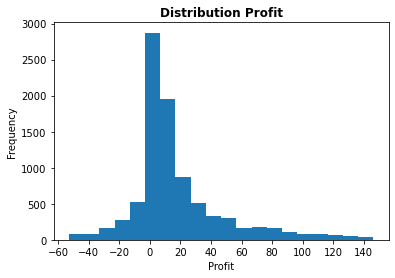

In [10]:
df_profit= df['Profit']
df_profit.hist(bins=20,grid=False)
plt.title('Distribution Profit',fontweight='bold')
plt.xlabel('Profit',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.locator_params(axis='x', nbins=20)
# plt.show()
plt.savefig('profit_histogram.png')

Ok, now we see somewhat of a right skewed distribution but not too bad. Let's continue on...

Let's look at a <b>histograms</b> of each data element to get a better sense of our features against profit. 

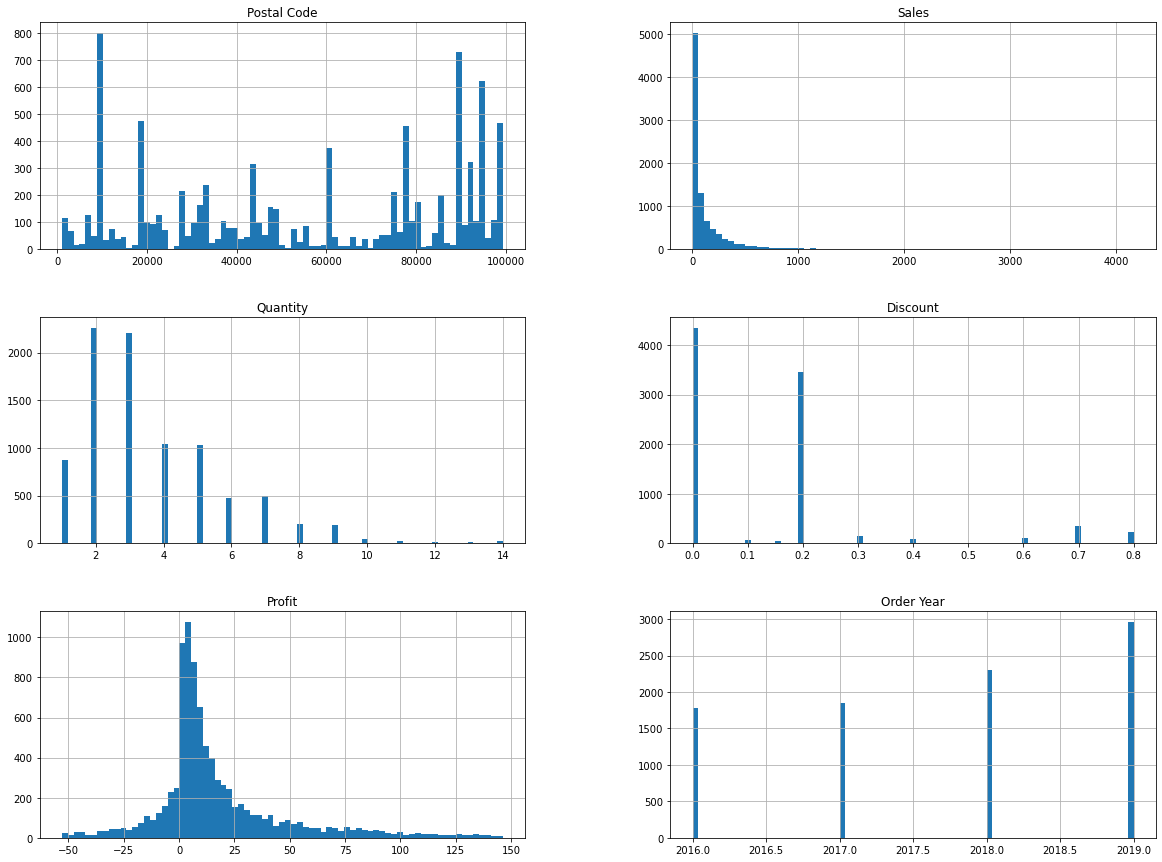

In [11]:
df.hist(bins=75, figsize=(20,15))
plt.show()

Here are a few things I notice right away:

<ol>
  <li>The majority of orders have about 2-3 items, but the population has a slightly right skewed distribution.</li>
  <li>Sales has a large right skewed distribution. This makes sense since most of the units sold are small in value.</li>
  <li>The total number of orders by year slightly increases with each year. (we will treat this as categorical)</li>
  <li>Most of the orders are not provided a discount; others are given a 2% discount</li>
  <li>We can ignore Postal Code as it is qualitative in nature rather than quantitative</li>
</ol>

Let's look at sales a little more closely so we can see how detailed the skew is

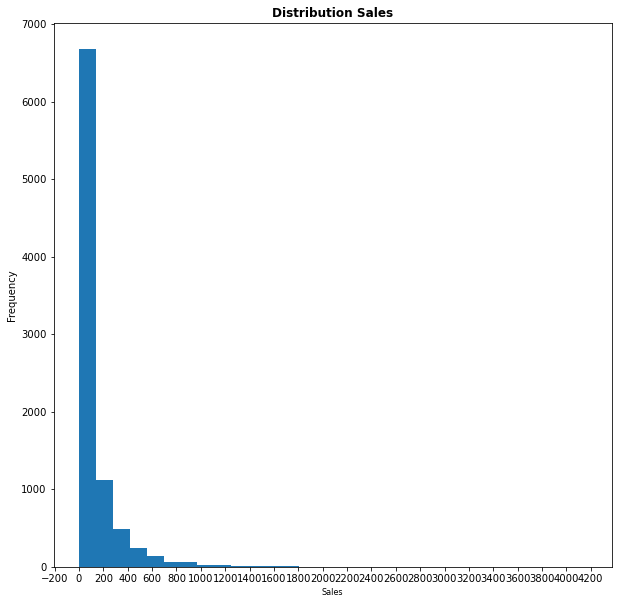

In [12]:
df_profit= df['Sales']
df_profit.hist(bins=30,grid=False, figsize=(10,10))

plt.title('Distribution Sales',fontweight='bold')
plt.xlabel('Sales',fontsize=8)
plt.ylabel('Frequency',fontsize=10)
plt.locator_params(axis='x', nbins=25)
# plt.show()
plt.savefig('sales_histogram.png')

## Analyze Quantitative Attributes

In our dataset, let's look at how each attribute correlates with profit

In [13]:
corr_matrix = df.corr()

In [14]:
corr_matrix["Profit"].sort_values(ascending=False)

Profit         1.000000
Sales          0.489031
Quantity       0.209080
Order Year    -0.005553
Postal Code   -0.018486
Discount      -0.372591
Name: Profit, dtype: float64

<i>Correlation Observations</i>:

<ol>
  <li>Not surprisingly, Sales is positively correlated to profit; discounts are negatively correlated to profit, which also makes sense in that the amount of discounts you give a customer will deter higher profits.</li>
  <li>Interestingly, quantity is slightly correlated. One would think there would be more correlation in that the more you sell products the more profit you would gain but our dataset does not provide us with that conclusion. </li>
  <li>Order Year appears to have no real correlation to Profit.</li>
</ol>

Let's also check for correlation using a scatter plot. Let's only look at profit, sales, quantity, and discount


array([[<AxesSubplot:xlabel='Profit', ylabel='Profit'>,
        <AxesSubplot:xlabel='Sales', ylabel='Profit'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Profit'>,
        <AxesSubplot:xlabel='Discount', ylabel='Profit'>],
       [<AxesSubplot:xlabel='Profit', ylabel='Sales'>,
        <AxesSubplot:xlabel='Sales', ylabel='Sales'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Sales'>,
        <AxesSubplot:xlabel='Discount', ylabel='Sales'>],
       [<AxesSubplot:xlabel='Profit', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Sales', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Discount', ylabel='Quantity'>],
       [<AxesSubplot:xlabel='Profit', ylabel='Discount'>,
        <AxesSubplot:xlabel='Sales', ylabel='Discount'>,
        <AxesSubplot:xlabel='Quantity', ylabel='Discount'>,
        <AxesSubplot:xlabel='Discount', ylabel='Discount'>]], dtype=object)

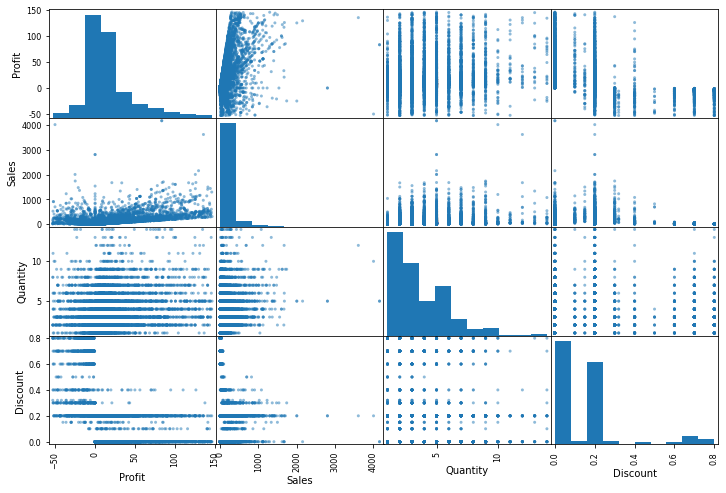

In [15]:
from pandas.plotting import scatter_matrix
attributes_to_plot = ["Profit","Sales","Quantity","Discount"]

scatter_matrix(df[attributes_to_plot], figsize=(12,8))

Interesting results. Strong horizontal lines exist for quantity, discount, and year. Let's keep this in mind as we begin to build our model.

Otherwise based on what we can see, the attribute that looks best to predict profit in this dataset is sales. Let's look at this histogram a little closer

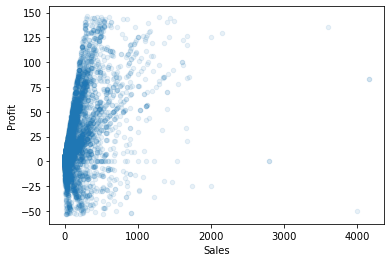

In [16]:
hist = df.plot(kind="scatter",x="Sales",y="Profit",alpha=0.1)
hist.figure.savefig('sales_to_profit_histogram.png')

The scatterplot reveals a few things:

<ol>
  <li>You can see the makings of a STEEP trend, but there's a lot of data that causes a faning affect. There are a few outliers that dip under the main trend, but for the most part there's a vague but perceptible upward trend.</li>
  <li>Given the slight 'v' shape of the data, we might want to consider adjusting our final model to account for this interesting trend</li>
</ol>

## Analyze Qualitative Attributes

In our data, we have several qualitative attributes:

<ol>
  <li>Order ID</li>
  <li>Customer ID</li>
  <li>Customer Segment</li>
  <li>Postal Code</li>
  <li>City</li>
  <li>State</li>
  <li>Region</li>
  <li>Product ID</li>
  <li>Product Category</li>
  <li>Product SubCategory</li>
  <li>Order Year</li>
</ol>

Some of these attributes are 'hierarchical' in nature, meaning the attributes assigned to an observation can be grouped into categories. For example, we can remove the product id and customer id because of its <b>collinearity</b> with product & customer categories. Since Order id and rowid is unique per order, we can drop that as well. We can remove the 'Product Sub-category' as this is colinear to Product Category too.

Another element we will remove from this model is lower level location attributes, such as city, state, and postal code; they too have a <b>colinear</b> relationship with region.

Now let's look at Customer Segment, Region, Product Category, and Order Year the new qualitative attributes we will use in our model:

In [17]:
cleaned_df = df.drop(['Product ID','Sub-Category','Order ID','City','State','Postal Code','Customer ID'], axis = 1)
print("Segment Categories: ",cleaned_df['Segment'].unique())
print("Region Categories: ",cleaned_df['Region'].unique())
print("Product Categories: ",cleaned_df['Category'].unique())
print("Order Years: ",cleaned_df['Order Year'].unique())

Segment Categories:  ['Consumer' 'Corporate' 'Home Office']
Region Categories:  ['South' 'West' 'Central' 'East']
Product Categories:  ['Furniture' 'Office Supplies' 'Technology']
Order Years:  [2018 2017 2016 2019]


Let's explore the features

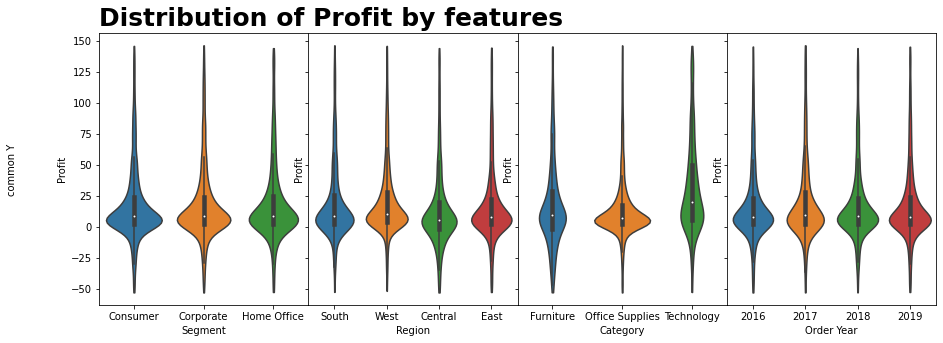

In [18]:
fig, axes = plt.subplots(1, 4,figsize=(15,5),sharey='row')
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
plt.subplots_adjust(wspace=0)
sns.violinplot(df["Segment"],df["Profit"], ax=axes[0], cut=0) #ztest
sns.violinplot(df["Region"],df["Profit"], ax=axes[1], cut=0) #ztest
sns.violinplot(df["Category"],df["Profit"], ax=axes[2], cut=0) #ztest
sns.violinplot(df["Order Year"],df["Profit"], ax=axes[3], cut=0) #ztest
plt.suptitle('Distribution of Profit by features', ha = 'left',fontweight='bold',fontsize=25,x=0.125,y=.9,va='baseline')

plt.savefig('profit_distributiion_violins.png')

#Code body for violin plots respectfully derived from this project: https://github.com/a-woodbury/A-House-with-a-View

<i><b>Violin plots</b></i> are great when you want to review numeric data (Profit) and its distribution among groups of data; it also shows the interquartile range of the profit data within each group & sets them side by side for easy comparisons. I love how easily you can see <b>density</b> or frequency of the data for each group.

For the most part, the means & interquartile ranges for profit are similar for all categories in Segment, Region, and Order Year. The shapes of the distributions between each category in Segment, Region, and Order are also similar, indicating that there are is a small frequency of really large values making the smoothed distributions (i.e. the shape of the violins) look really stretched.

The category feature contains some interesting insights: It looks like Office Supplies have really low profits for the most part (hence the fat shape of the violin); furniture & technology are very thin and give the indication that they have higher price points than that of office supplies. This make sense given that furniture & technology tend to be more expensive.

Since the product category plays a huge factor in the behavior of the data, we will consider this when we create dummy variables

## Creating dummy variables for our model

Since most machine learning algorithms like to work with numbers, let's convert these categories from text to dummy arrays, joining them back onto our main training dataframe

Note that because the product categories act differently when they are office supplies versus Technology/Furniture, let's only include a feature to denote that it's office supplies

In [19]:
#Added Dummy Variables to NoofStories & DwellingType
Segments = pd.get_dummies(cleaned_df['Segment'])
Regions = pd.get_dummies(cleaned_df['Region'])
Categories = pd.get_dummies(cleaned_df['Category'])
OrderYears = pd.get_dummies(cleaned_df['Order Year'])

#Joined to dummy variables & original continuous variables to new dataframe. Drop data we do not need in the model
processed_results = pd.concat([cleaned_df, Segments ,Regions,Categories["Office Supplies"],OrderYears], axis=1, join='inner')
processed_results = processed_results.drop(['Region','Segment','Category','Order Year'], axis = 1)
processed_results.head()

,Sales,Quantity,Discount,Profit,Consumer,Corporate,Home Office,Central,East,South,West,Office Supplies,2016,2017,2018,2019
0,261.960,2,0.0,41.9136,1,0,0,0,0,1,0,0,0,0,1,0
2,14.620,2,0.0,6.8714,0,1,0,0,0,0,1,1,0,0,1,0
4,22.368,2,0.2,2.5164,1,0,0,0,0,1,0,1,0,1,0,0
5,48.860,7,0.0,14.1694,1,0,0,0,0,0,1,0,1,0,0,0
6,7.280,4,0.0,1.9656,1,0,0,0,0,0,1,1,1,0,0,0


## Preprocessing Quantiative Variables

Now that we have the qualitative & quantitative attributes selected, we should look at how to standardize the quatitative attributes. Attributes like 'Sales' and 'Order Year' could become more influential than 'Quantity' and 'Discount' in our model given the larger size observations. 

Let's use Sci-Kit Learn's Standard Scaler to ensure that certain variables do not have more weight in our model

In [20]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [21]:

processed_results[['Sales','Quantity','Discount','Profit_Processed']]= scaler.fit_transform(processed_results[['Sales','Quantity','Discount','Profit']])
processed_results.head()

,Sales,Quantity,Discount,Profit,Consumer,Corporate,Home Office,Central,East,South,West,Office Supplies,2016,2017,2018,2019,Profit_Processed
0,0.646988,-0.767344,-0.741646,41.9136,1,0,0,0,0,1,0,0,0,0,1,0,0.792068
2,-0.496190,-0.767344,-0.741646,6.8714,0,1,0,0,0,0,1,1,0,0,1,0,-0.349741
4,-0.460380,-0.767344,0.274682,2.5164,1,0,0,0,0,1,0,1,0,1,0,0,-0.491643
5,-0.337937,1.565803,-0.741646,14.1694,1,0,0,0,0,0,1,0,1,0,0,0,-0.111944
6,-0.530115,0.165915,-0.741646,1.9656,1,0,0,0,0,0,1,1,1,0,0,0,-0.509590


## Create a Test Set

Before we continue further, let's isolate our target variable (Profit) from our features. After that, let's break out our dataset into a training & test set. Given that the data is close to 100k records, I will use 10% of the data to test, giving me ~90k to train and ~10k to test my model.

I will use Scikit-Learn to break out data into train & test; since I might need to rerun my code a few times, I'm using seeding to ensure that results in my test & train set do not overlap

In [22]:
from sklearn.model_selection import train_test_split

target = processed_results[['Profit','Profit_Processed']]
features = processed_results.drop(['Profit','Profit_Processed'], axis = 1)
data_train,data_test,target_train,target_test = train_test_split(features,target['Profit'],test_size=0.1,random_state=42)

## Select and Train Linear Regression Model

Now that we have our explored, preprocessed, and split our dataset into a training & testing set, let's first train a linear regression model.

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data_train,target_train)

LinearRegression()

## Evaluating Linear Regression Model

Let's measure this regression model using the score in the LinearRegression().score() method to return the coefficient of determination R^2 of the prediction:

In [24]:
lin_reg.score(data_test, target_test)

0.42126103601630394

Not the best R^2 score; we're looking to get closer to 1.

In a real world use case, I would go back to the business and ask for additonal information about these orders, such as quality of feedback from the sale (enhancing it using a feedback form associated with the order). But since this is the data we have, let's continue to tweak our model.

## Tweaking our Model

Let's see if we can tweak our model to help improve it

In [25]:
from sklearn.preprocessing import PolynomialFeatures

quad = PolynomialFeatures (degree = 2 )
x_quad = quad.fit_transform(features)

data_train,data_test,target_train,target_test = train_test_split(x_quad,target['Profit'],test_size=0.1,random_state=42)

plr = LinearRegression().fit(data_train,target_train)

Y_train_pred = plr.predict(data_train)
Y_test_pred = plr.predict(data_test)

print(plr.score(data_test,target_test))

0.4727783991275235


By incorporating polynomial features into our model, it gets a little bit better R^2 but not by much. Let's try RandomForestRegressor instead

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
forest.fit(data_train,target_train)
forest_train_pred = forest.predict(data_train)
forest_test_pred = forest.predict(data_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(target_train,forest_train_pred),
mean_squared_error(target_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(target_train,forest_train_pred),
r2_score(target_test,forest_test_pred)))

MSE train data: 42.538, MSE test data: 344.352
R2 train data: 0.954, R2 test data: 0.686


Wow! Much better! Looks like Random Forest does a wayyy better job determining our model than linear or logistic regression.

## Plotting our results

Since Random Forest performed the best out of the 3 models, let's show how our training set compares to our testing set



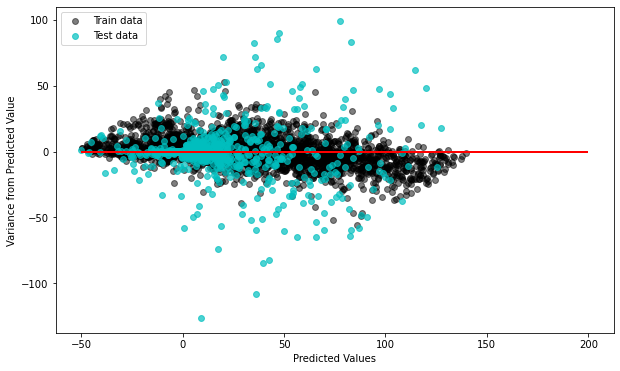

In [27]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - target_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - target_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Variance from Predicted Value')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -50, xmax = 200, lw = 2, color = 'red')
plt.savefig('test_train_scatter.png')

For the most part, pretty good! There's still some outliers that didn't quite make the cut BUT for the most part, our random forest model did a pretty good job predicting profit.

## Conclusion

While Random Forest did a relatively good job at predicting Profit, here's what I would say to my stakeholders about the model:

<ol>
  <li><b>The Model Like Cheap Products, Especially Office Supplies</b> In a perfect world, we would have a great representation of all products that Super Store sells. Realistically with this data, a ton of orders were really low in price and therefore profit. The model is great at predicting cheaper products sold by Superstore</li>
  <li><b>How about overseas sales? </b> Assuming that SalesSuperstore has business overseas (I mean they ARE a superstore affter all), I'd like to incorporate data for overseas sales to get a true picture. Different countries may have different preferences and may buy more furniture/tech than office supplies.</li>
    <li><b>More historical years please! </b>If we have more than the past 4 years' worth of data, we could provide an even better prediction of future profits.</li>
</ol>